In [1]:
import pandas as pd

transactions = pd.read_csv("Transactions.csv")

customer_data = transactions.groupby("CustomerID").agg(
    Total_Spent=("TotalValue", "sum"),  
    Purchase_Frequency=("TransactionID", "count")  
).reset_index()

print(customer_data.head())


  CustomerID  Total_Spent  Purchase_Frequency
0      C0001      3354.52                   5
1      C0002      1862.74                   4
2      C0003      2725.38                   4
3      C0004      5354.88                   8
4      C0005      2034.24                   3


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

customer_data_scaled = scaler.fit_transform(customer_data[['Total_Spent', 'Purchase_Frequency']])

customer_data_scaled = pd.DataFrame(customer_data_scaled, columns=['Total_Spent', 'Purchase_Frequency'])

print(customer_data_scaled.head())


   Total_Spent  Purchase_Frequency
0    -0.061701           -0.011458
1    -0.877744           -0.467494
2    -0.405857           -0.467494
3     1.032547            1.356650
4    -0.783929           -0.923530


In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

print(customer_data.head())


  CustomerID  Total_Spent  Purchase_Frequency  Cluster
0      C0001      3354.52                   5        3
1      C0002      1862.74                   4        3
2      C0003      2725.38                   4        3
3      C0004      5354.88                   8        0
4      C0005      2034.24                   3        1


In [8]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(customer_data_scaled, customer_data['Cluster'])

print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 0.8549985995491829


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import numpy as np

best_k = None
best_db_index = float('inf')
scores = {}

for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(customer_data_scaled)

    db_index = davies_bouldin_score(customer_data_scaled, clusters)
    scores[k] = db_index  
    
    if db_index < best_db_index:  
        best_db_index = db_index
        best_k = k

print(f"Best K: {best_k} with Davies-Bouldin Index: {best_db_index}")


Best K: 2 with Davies-Bouldin Index: 0.73411606787063


In [6]:

kmeans = KMeans(n_clusters=best_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

customer_data.to_csv("RuhulFatimaAbdi_Optimized_Clustering.csv", index=False)

print(f"Final Clustering Done with K = {best_k}. File Saved!")


Final Clustering Done with K = 2. File Saved!


In [ ]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

best_k = None
best_db_index = float('inf')
scores = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(customer_data_scaled)

    db_index = davies_bouldin_score(customer_data_scaled, clusters)
    silhouette_avg = silhouette_score(customer_data_scaled, clusters)
    ch_score = calinski_harabasz_score(customer_data_scaled, clusters)
    
    scores[k] = {"Davies-Bouldin": db_index, "Silhouette": silhouette_avg, "Calinski-Harabasz": ch_score}

    if db_index < best_db_index:
        best_db_index = db_index
        best_k = k

print(f"Best K: {best_k} with DB Index: {best_db_index}")
print(scores) 


Best K: 2 with DB Index: 0.73411606787063
{2: {'Davies-Bouldin': 0.73411606787063, 'Silhouette': 0.4868517490395335, 'Calinski-Harabasz': 281.8737593856969}, 3: {'Davies-Bouldin': 0.7662431505517309, 'Silhouette': 0.42351438777086287, 'Calinski-Harabasz': 277.3018525997935}, 4: {'Davies-Bouldin': 0.8595340221510472, 'Silhouette': 0.37724079925411, 'Calinski-Harabasz': 266.56383720722874}, 5: {'Davies-Bouldin': 0.8491558302577694, 'Silhouette': 0.38986113414113127, 'Calinski-Harabasz': 252.46232888800293}, 6: {'Davies-Bouldin': 0.916991065489294, 'Silhouette': 0.3905538909606528, 'Calinski-Harabasz': 245.5377700981199}, 7: {'Davies-Bouldin': 0.8764024481514089, 'Silhouette': 0.38585024014603786, 'Calinski-Harabasz': 252.21102377375274}, 8: {'Davies-Bouldin': 0.9076594222544654, 'Silhouette': 0.37147692627968426, 'Calinski-Harabasz': 244.52345091247733}, 9: {'Davies-Bouldin': 0.879537925488679, 'Silhouette': 0.3712975134971535, 'Calinski-Harabasz': 244.82654369193304}, 10: {'Davies-Bould

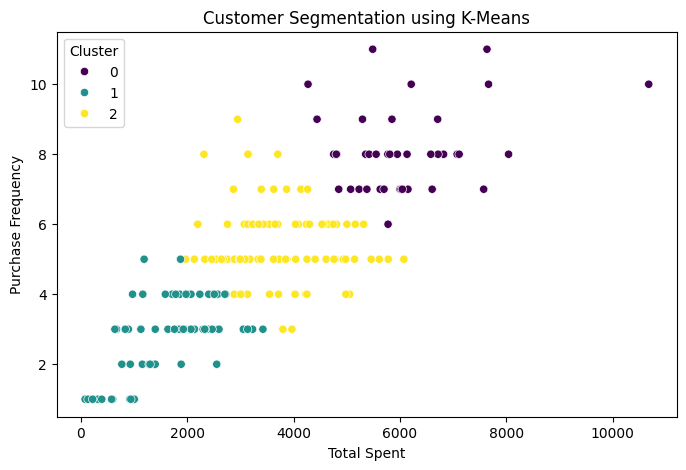

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(data=customer_data, x='Total_Spent', y='Purchase_Frequency', hue='Cluster', palette='viridis')
plt.xlabel("Total Spent")
plt.ylabel("Purchase Frequency")
plt.title("Customer Segmentation using K-Means")
plt.show()


In [17]:
customer_data.to_csv("RuhulFatimaAbdi_Clustering.csv", index=False)
print("Customer Segmentation results saved as RuhulFatimaAbdi_Clustering.csv!")


Customer Segmentation results saved as RuhulFatimaAbdi_Clustering.csv!
